# A demo walkthrough of downloading and building taxonomies for two iHMP metagenomes

The below demo does the following:
* uses an NCPI manifest file exported from [the CFDE data portal](https://app.nih-cfde.org/) to download two iHMP metagenomes via [GA4GH DRS](https://ga4gh.github.io/data-repository-service-schemas/preview/release/drs-1.0.0/docs/).
* sketches the metagenomes into k-mer FracMinHash sketches using the [sourmash software] (https://sourmash.readthedocs.io/en/latest/).
* searches the metagenomes against [the Genome Taxonomy Database](https://gtdb.ecogenomic.org/) to find [a minimum metagenome cover](https://www.biorxiv.org/content/10.1101/2022.01.11.475838v2).
* presents a taxonomic view of the metagenomes using [metacoder](https://github.com/grunwaldlab/metacoder).

🎉

It can be run on an Amazon cloud instance easily; see [the host repo](https://github.com/ctb/2022-may-cfde-demo) for installation instructions.

## Set up paths

In [1]:
!echo $PATH

/opt/tljh/user/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin


In [2]:
import os
print(os.environ['PATH'])
os.environ['PATH'] = '/home/jupyter-cfde/miniforge3/bin:' + os.environ['PATH']

/opt/tljh/user/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin


In [3]:
os.environ['PATH']

'/home/jupyter-cfde/miniforge3/bin:/opt/tljh/user/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin'

## Do a dry run download - everything green?

I've built a little [snakemake](http://snakemake.readthedocs.io/) workflow to download the contents of the manifest.

Let's see if it has any complaints:

In [4]:
!snakemake -s download.drs -j 1 --config manifest=example-manifest.csv -n

Getting mZBm6TYnDQoS from https://drs.hmpdacc.org
Getting DGLpSDR29kHp from https://drs.hmpdacc.org
Building DAG of jobs...
Job stats:
job        count    min threads    max threads
-------  -------  -------------  -------------
all            1              1              1
drs_get        2              1              1
total          3              1              1


[Wed May 11 00:56:00 2022]
rule drs_get:
    output: DGLpSDR29kHp
    jobid: 2
    wildcards: drs_id=DGLpSDR29kHp
    resources: tmpdir=/tmp


[Wed May 11 00:56:00 2022]
rule drs_get:
    output: mZBm6TYnDQoS
    jobid: 1
    wildcards: drs_id=mZBm6TYnDQoS
    resources: tmpdir=/tmp


[Wed May 11 00:56:00 2022]
localrule all:
    input: mZBm6TYnDQoS, DGLpSDR29kHp
    jobid: 0
    resources: tmpdir=/tmp

Job stats:
job        count    min threads    max threads
-------  -------  -------------  -------------
all            1              1              1
drs_get        2              1              1
total          3      

## Fire for effect: run the download

If everything above is green or yellow, then snakemake thinks everything is ready to go.

Now we can actually run the download:

In [5]:
!snakemake -s download.drs -j 2 --config manifest=example-manifest.csv

Getting mZBm6TYnDQoS from https://drs.hmpdacc.org
Getting DGLpSDR29kHp from https://drs.hmpdacc.org
Building DAG of jobs...
Using shell: /usr/bin/bash
Provided cores: 2
Rules claiming more threads will be scaled down.
Job stats:
job        count    min threads    max threads
-------  -------  -------------  -------------
all            1              1              1
drs_get        2              1              1
total          3              1              1

Select jobs to execute...

[Wed May 11 00:56:03 2022]
rule drs_get:
    output: DGLpSDR29kHp
    jobid: 2
    wildcards: drs_id=DGLpSDR29kHp
    resources: tmpdir=/tmp


[Wed May 11 00:56:03 2022]
rule drs_get:
    output: mZBm6TYnDQoS
    jobid: 1
    wildcards: drs_id=mZBm6TYnDQoS
    resources: tmpdir=/tmp

2022-05-11 00:56:03,877	DEBUG	command-line arguments: {'download': True, 'url': 'https://drs.hmpdacc.org', 'object_id': 'mZBm6TYnDQoS', 'authtoken': 'omitted', 'expand': False, 'logfile': None, 'max_threads': 1, 'output_dir

Everything green and/or yellow? No red?

If so, victory! 🎉

## Look at downloaded files

The files that were downloaded were placed in subdirectories corresponding to the DRS paths, `DGLpSDR29kHp/` and  `mZBm6TYnDQoS/`.

(For new manifests, the only way to figure out what the right paths are is to look at the manifest file, or read the output of the snakemake run - see "Getting ..." output, above.)

In [6]:
ls

DEMO.md        README.md                example-manifest.csv
DGLpSDR29kHp/  demo-walkthrough.ipynb   mZBm6TYnDQoS/
INSTALL.md     download.drs             sourmash_gather_to_metacoder_plot.R*
LICENSE        drs_download_report.txt


In [7]:
ls DGLpSDR29kHp/ mZBm6TYnDQoS/

DGLpSDR29kHp/:
SRR5950647_1.fastq

mZBm6TYnDQoS/:
SRR5935743_1.fastq


## Sketch them with sourmash

Next, we will construct k-mer sketches with [sourmash](http://sourmash.readthedocs.io/), some software my group maintains.

In [8]:
!sourmash sketch dna DGLpSDR29kHp/*.fastq mZBm6TYnDQoS/*.fastq


== This is sourmash version 4.3.0. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

computing signatures for files: DGLpSDR29kHp/SRR5950647_1.fastq, mZBm6TYnDQoS/SRR5935743_1.fastq
Computing a total of 1 signature(s) for each input.
... reading sequences from DGLpSDR29kHp/SRR5950647_1.fastq
calculated 1 signatures for 213433 sequences in DGLpSDR29kHp/SRR5950647_1.fastq
saved 1 signature(s) to 'SRR5950647_1.fastq.sig'. Note: signature license is CC0.
... reading sequences from mZBm6TYnDQoS/SRR5935743_1.fastq
calculated 1 signatures for 201473 sequences in mZBm6TYnDQoS/SRR5935743_1.fastq
saved 1 signature(s) to 'SRR5935743_1.fastq.sig'. Note: signature license is CC0.


## Download a sourmash database and taxonomy file

We'll use the [sourmash prepared files](https://sourmash.readthedocs.io/en/latest/databases.html) for [the Genome Taxonomy Database](https://gtdb.ecogenomic.org/) genomic representatives.

This is a database containing ~60,000 genomes. (The full ~300k genome database is available; it just takes longer!)

In [9]:
!curl -JLO https://osf.io/v3zmg/download
!curl -JLO https://osf.io/3a6gn/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   483  100   483    0     0    291      0  0:00:01  0:00:01 --:--:--   292
100 3224k  100 3224k    0     0   437k      0  0:00:07  0:00:07 --:--:--  931k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   501  100   501    0     0    273      0  0:00:01  0:00:01 --:--:--   273
100 1725M  100 1725M    0     0  43.9M      0  0:00:39  0:00:39 --:--:-- 50.7M


In [10]:
ls -lh gtdb*

-rw-r--r-- 1 jupyter-cfde jupyter-cfde 1.7G May 11 00:57 gtdb-rs207.genomic-reps.dna.k31.zip
-rw-r--r-- 1 jupyter-cfde jupyter-cfde 3.2M May 11 00:56 gtdb-rs207.taxonomy.csv.gz


## Run sourmash to search the metagenome against the taxonomy

We will use [sourmash gather](https://sourmash.readthedocs.io/en/latest/command-line.html#sourmash-gather-find-metagenome-members) to build 
a [minimum metagenome cover](https://www.biorxiv.org/content/10.1101/2022.01.11.475838v2) for the first metagenome.
                              

First, let's test everything by doing a search against just the Prevotella members of the database.

This is a quick search (should take ~15 seconds) just to kick the tires:

In [11]:
!sourmash gather SRR5950647_1.fastq.sig gtdb-rs207.genomic-reps.dna.k31.zip --include prevotella


== This is sourmash version 4.3.0. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: DGLpSDR29kHp/SRR5950647_1.fast... (k=31, DNA)
loaded 1 databases.                                                            

Starting prefetch sweep across databases.
Found 4 signatures via prefetch; now doing gather.

overlap     p_query p_match
---------   ------- -------
115.0 kbp      2.1%    3.1%    GCF_015074785.1 Prevotella copri stra...
found less than 50.0 kbp in common. => exiting

found 1 matches total;
the recovered matches hit 2.1% of the query (unweighted)



## If that works, let's do a search against the full database

This will take ~5 minutes.

In [12]:
!sourmash gather SRR5950647_1.fastq.sig gtdb-rs207.genomic-reps.dna.k31.zip -o SRR5950647_1.gather.csv


== This is sourmash version 4.3.0. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: DGLpSDR29kHp/SRR5950647_1.fast... (k=31, DNA)
loaded 1 databases.                                                            

Starting prefetch sweep across databases.
Found 13 signatures via prefetch; now doing gather.

overlap     p_query p_match
---------   ------- -------
256.0 kbp      4.6%    5.2%    GCF_003697165.2 Escherichia coli DSM ...
115.0 kbp      2.1%    3.1%    GCF_015074785.1 Prevotella copri stra...
96.0 kbp       1.7%    1.9%    GCF_000012825.1 Bacteroides vulgatus ...
found less than 50.0 kbp in common. => exiting

found 3 matches total;
the recovered matches hit 8.4% of the query (unweighted)



## Now, build a taxonomic view based on the contents

In [13]:
!./sourmash_gather_to_metacoder_plot.R SRR5950647_1.gather.csv SRR5950647_1.tax.png


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

This is metacoder verison 0.3.5 (stable)
Rows: 317542 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ident, superkingdom, phylum, class, order, family, genus, species

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Summing per-taxon counts from 1 columns for 15 taxa


## View taxonomy

And now you can see the relatively uninteresting taxonomy of these very small samples 😂.

(For Thursday's sessions, we can do some bigger samples!)

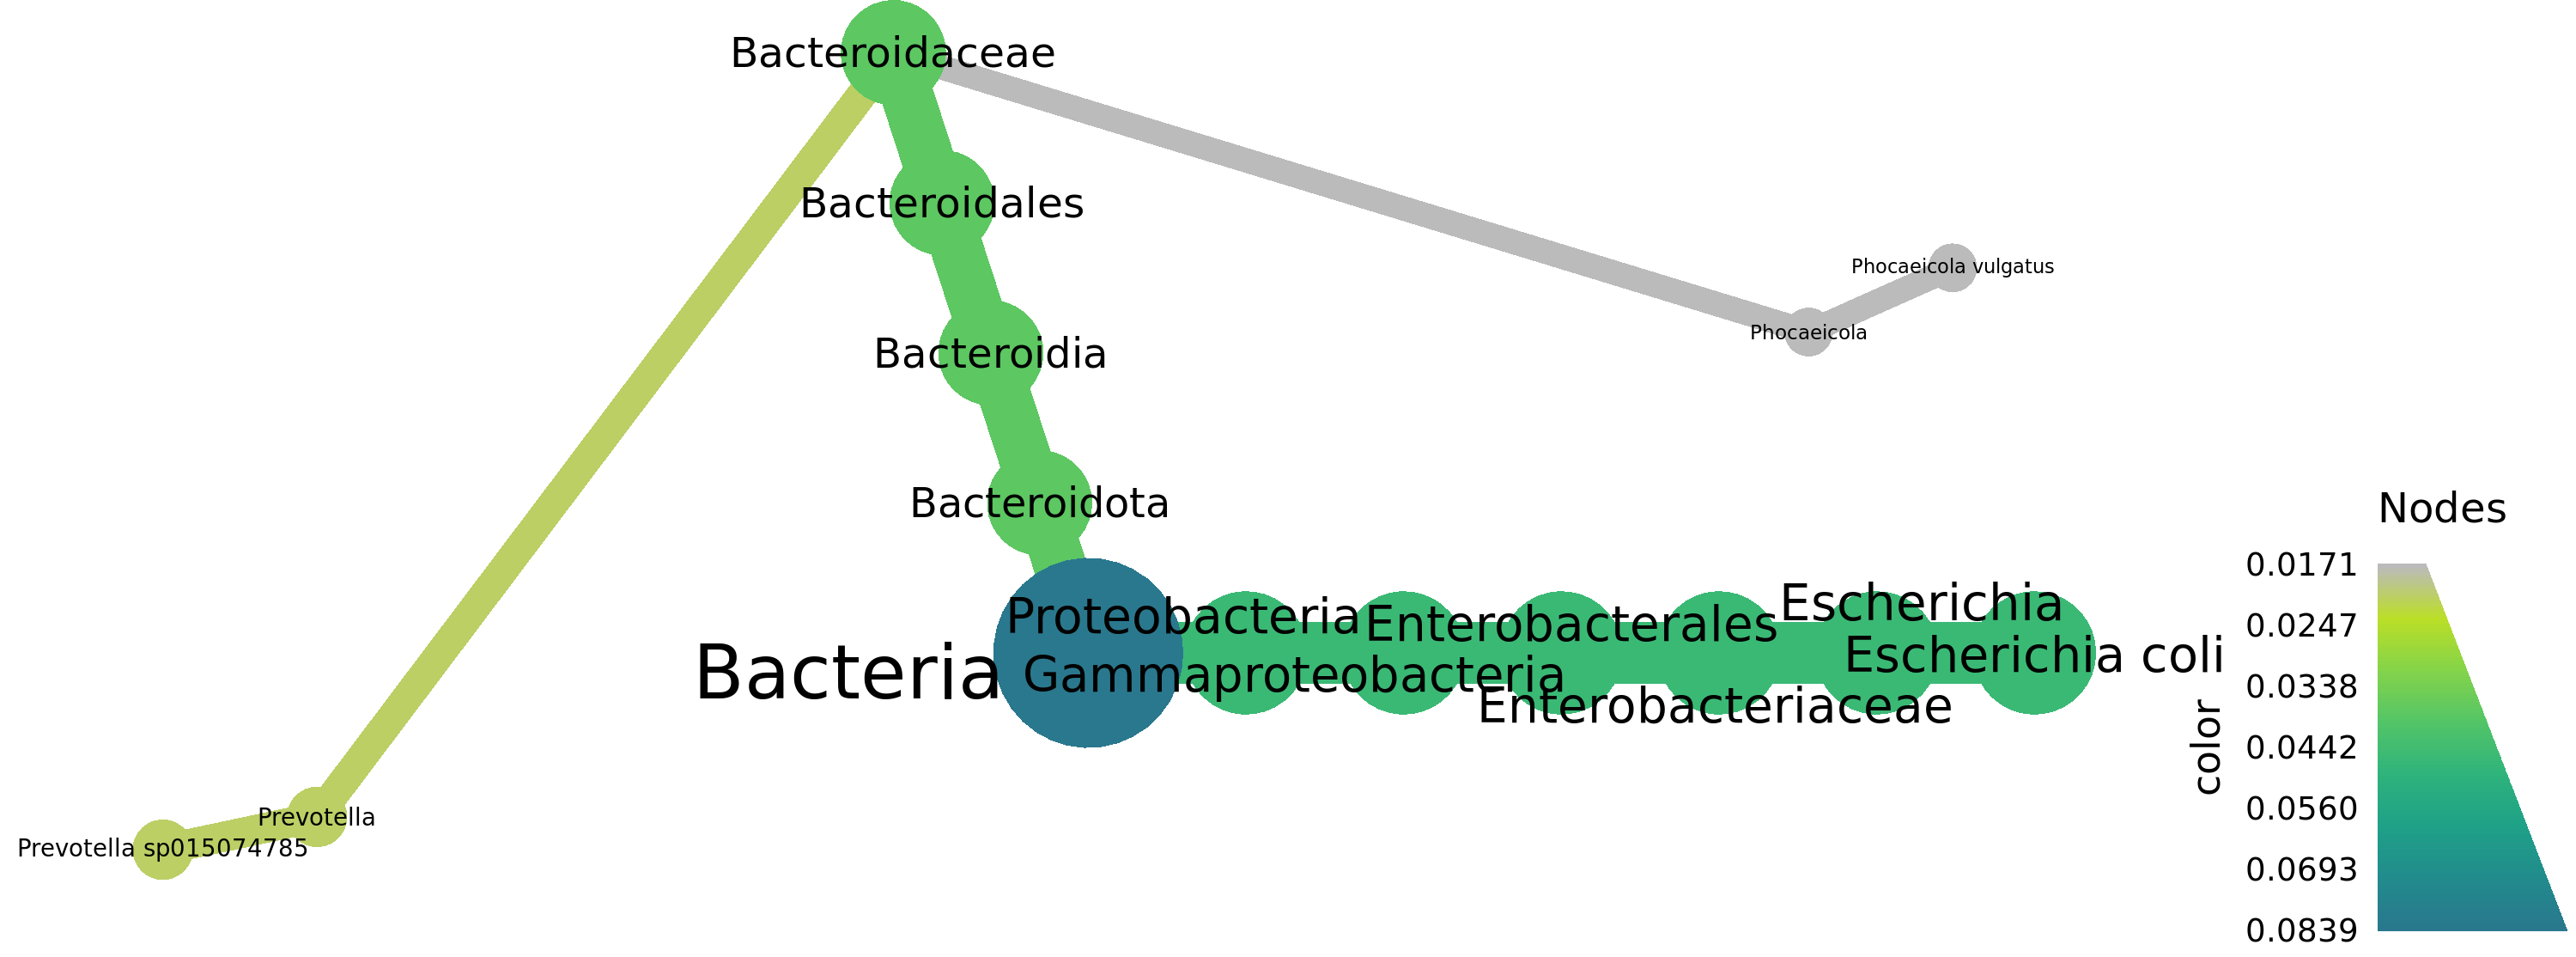

In [14]:
from IPython.display import Image
Image(filename='SRR5950647_1.tax.png') 

## Exercise for end of session today -

Try running the steps (from `sourmash gather` onwards) for the other sample, `SRR5935743_1`.